# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd

# file got uploaded in jupyter and is loaded using pandas
df = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
# downloading file using requests

import requests

r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv', )

with open('image-predictions.tsv', mode='wb') as file:
    file.write(r.content)

df_img = pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
# keys and ids for twitter api
consumer_key = "Hidden"

consumer_secret = "Hidden"

access_token = "Hidden"

access_token_secret = "Hidden"

In [ ]:
# getting query using tweepy library

import tweepy
import json

api = tweepy.API()

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Query from tweepy
progress = 0

with open('tweet_json.txt', mode='w') as dog_rate:
    for id in df.tweet_id:
        progress += 1
        print(progress)
        try:
            tweet = api.get_status(id, tweet_mode='extended')
            json.dump(tweet._json, dog_rate)
            dog_rate.write('\n')
            
        except:
            pass

In [3]:
# loading query from tweepy to pandas

tweep = 'tweet_json.txt'

tweep_json = pd.read_json(tweep, lines=True)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [4]:
# df dataframe visual assessment
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [5]:
df[df.in_reply_to_status_id.notna()].iloc[1]

tweet_id                                                     881633300179243008
in_reply_to_status_id                                      881607037314052096.0
in_reply_to_user_id                                                  47384430.0
timestamp                                             2017-07-02 21:58:53 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          @roushfenway These are good dogs but 17/10 is ...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                                                               NaN
rating_numerator                                                             17
rating_denominator                                                           10
name                                    

In [6]:
# df_img visual assessment
df_img

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [7]:
# tweep_json dataframe visual assessment
tweep_json

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2323,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2324,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2325,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2326,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [8]:
# CSV file programmatic assessment
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
df['tweet_id'].nunique()

2356

In [10]:
# TSV file programmatic assessment
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
# JSON file programmatic assessment
tweep_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2328 non-null   datetime64[ns, UTC]
 1   id                             2328 non-null   int64              
 2   id_str                         2328 non-null   int64              
 3   full_text                      2328 non-null   object             
 4   truncated                      2328 non-null   bool               
 5   display_text_range             2328 non-null   object             
 6   entities                       2328 non-null   object             
 7   extended_entities              2058 non-null   object             
 8   source                         2328 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

In [12]:
# sources used to post tweets in df dataframe
df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [13]:
# values under name column in df dataframe
df.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [14]:
# values under name that have less than 2 symbols in df
df[df.name.str.len() <= 2].name.value_counts()

a     55
Bo     9
an     7
Mo     1
O      1
Al     1
my     1
by     1
Ed     1
JD     1
Jo     1
Name: name, dtype: int64

In [15]:
# doggo, floofer, pupper and puppo visual analysis

In [16]:
df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [17]:
df.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [18]:
df.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [19]:
df.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [20]:
# rating denominator check

list(df[df.rating_denominator != 10].values)

[array([835246439529840640, 8.35245984028504e+17, 26259576.0,
        '2017-02-24 21:54:03 +0000',
        '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
        "@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",
        nan, nan, nan, nan, 960, 0, 'None', 'None', 'None', 'None', 'None'],
       dtype=object),
 array([832088576586297345, 8.320875475599974e+17, 30582082.0,
        '2017-02-16 04:45:50 +0000',
        '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
        '@docmisterio account started on 11/15/15', nan, nan, nan, nan, 11,
        15, 'None', 'None', 'None', 'None', 'None'], dtype=object),
 array([820690176645140481, nan, nan, '2017-01-15 17:52:40 +0000',
        '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
        'The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/N

In [21]:
# rating in text vs rating_denominator
df[df.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']].values

C:\Users\davit\AppData\Local\Temp/ipykernel_14464/2971972718.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df[df.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']].values


array([['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
        5],
       ["RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",
        75],
       ["This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
        75],
       ["This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
        27],
       ["I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace",
        5],
       ['Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD',
        26]], dtype=object)

### Quality issues

1. `df` dataframe includes retweets

2. `df` dataframe contains data beyond 1st August of 2017, for which there is no image prediction data in `df_img` dataframe

3. In `df_img` not all tweets are regarding dogs, need to leave tweets regarding to dogs and drop the rest from both `df_img` and `df` dataframes

4. In `df` under `source` column, links have html tags and they should be removed

5. In `df` dataframe need to remove rows, where values are not Null under `in_reply_to_status_id`, because they don't provide actual rating

6. `rating_numerator` and `rating_denominator` should be expressed in single column in `df` dataframe

7. Drop redundant columns in `df` dataframe and missing data

8. `rating_numerator` doesn't match with the rating provided in the text

9. `tweet_id` column in `df` dataframe is integer instead of string

### Tidiness issues
1. Merge `retweet_count` and `favorite_count` columns from `tweepy_json` and breed from `df_img` to `df` dataframe

2. Join `doggo`, `floofer`, `puppo` and `pupper` columns into one single column

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [22]:
# Make copies of original pieces of data
df_clean = df.copy()
df_img_clean = df_img.copy()
tweepy_clean = tweep_json.copy()

### Issue 1: Join `doggo`, `floofer`, `puppo` and `pupper` columns into one single column

**Define:** These columns can be represented into single column

#### Code

In [23]:
# Combine last four columns into single
df_clean['dog_type'] = None

In [24]:
for i in df_clean.index:

    if df_clean.loc[i:i, ('doggo', 'floofer', 'pupper', 'puppo')].T.duplicated().sum() == 2:
        if df_clean.loc[i, ('doggo')] == 'doggo':
            df_clean.loc[i, ('dog_type')] = 'doggo'

        elif df_clean.loc[i, ('floofer')] == 'floofer':
            df_clean.loc[i, ('dog_type')] = 'floofer'

        elif df_clean.loc[i, ('pupper')] == 'pupper':
            df_clean.loc[i, ('dog_type')] = 'pupper'

        elif df_clean.loc[i, ('puppo')] == 'puppo':
            df_clean.loc[i, ('dog_type')] = 'puppo'
            
    else:
        df_clean.loc[i, ('dog_type')] = 'unknown'

#### Test

In [25]:
df_clean[df_clean.doggo == 'doggo'].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_type
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,doggo
43,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,None,None,None,doggo
99,872967104147763200,NaN,NaN,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872967104...,12,10,None,doggo,None,None,None,doggo
108,871515927908634625,NaN,NaN,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo,None,None,None,doggo
110,871102520638267392,NaN,NaN,2017-06-03 20:33:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,NaN,NaN,NaN,https://twitter.com/animalcog/status/871075758...,14,10,None,doggo,None,None,None,doggo


In [26]:
df_clean[df_clean.floofer == 'floofer'].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_type
46,883360690899218434,NaN,NaN,2017-07-07 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883360690...,13,10,Grizzwald,None,floofer,None,None,floofer
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None,unknown
582,800388270626521089,NaN,NaN,2016-11-20 17:20:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Doc. He takes time out of every day to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/800388270...,12,10,Doc,None,floofer,None,None,floofer
774,776218204058357768,NaN,NaN,2016-09-15 00:36:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Atlas rolled around in some chalk and now he's...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776218204...,13,10,None,None,floofer,None,None,floofer
984,749317047558017024,NaN,NaN,2016-07-02 19:01:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Blu. He's a wild bush Floofer. I wish ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749317047...,12,10,Blu,None,floofer,None,None,floofer


In [27]:
df_clean[df_clean.pupper == 'pupper'].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_type
29,886366144734445568,NaN,NaN,2017-07-15 23:25:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,None,None,pupper,None,pupper
49,882762694511734784,NaN,NaN,2017-07-06 00:46:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gus. He's quite the cheeky pupper. Alr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/882762694...,12,10,Gus,None,None,pupper,None,pupper
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None,pupper
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,512804507.0,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None,pupper
82,876838120628539392,NaN,NaN,2017-06-19 16:24:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ginger. She's having a ruff Monday. To...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/876838120...,12,10,Ginger,None,None,pupper,None,pupper


In [28]:
df_clean[df_clean.puppo == 'puppo'].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_type
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo,puppo
14,889531135344209921,NaN,NaN,2017-07-24 17:02:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,None,None,None,puppo,puppo
71,878776093423087618,NaN,NaN,2017-06-25 00:45:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Snoopy. He's a proud #PrideMonthPuppo....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878776093...,13,10,Snoopy,None,None,None,puppo,puppo
94,874012996292530176,NaN,NaN,2017-06-11 21:18:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sebastian. He can't see all the colors...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/874012996...,13,10,Sebastian,None,None,None,puppo,puppo
129,867421006826221569,NaN,NaN,2017-05-24 16:44:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shikha. She just watched you drop a sk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/867421006...,12,10,Shikha,None,None,None,puppo,puppo


In [29]:
df_clean[df_clean.dog_type == 'unknown'].sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_type
1957,673583129559498752,NaN,NaN,2015-12-06 19:21:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sandy. She loves her spot by the tree....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673583129...,11,10,Sandy,None,None,None,None,unknown
145,863553081350529029,NaN,NaN,2017-05-14 00:34:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Neptune. He's a backpup vocalist for t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863553081...,13,10,Neptune,None,None,None,None,unknown
1622,684914660081053696,NaN,NaN,2016-01-07 01:49:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Hello yes I'll just get one of each color tha...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684914660...,12,10,None,None,None,None,None,unknown
1090,737678689543020544,NaN,NaN,2016-05-31 16:14:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/737678689...,11,10,None,None,None,None,None,unknown
1426,697881462549430272,NaN,NaN,2016-02-11 20:34:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Carter. He wakes up in the morning and...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697881462...,10,10,Carter,None,None,None,None,unknown


### Issue 2: `df` dataframe contains data beyond 1st August of 2017, for which there is no image prediction data in `df_img` dataframe

**Define:** In `df` dataframe timestamp will be transformed into datetime format and will get filtered

#### Code

In [30]:
# reformat to datetime
df_clean.timestamp = pd.to_datetime(df_clean.timestamp)

In [31]:
# drop data beyond 1st of August 2017
df_clean.drop(df_clean[df_clean.timestamp >= '8/1/2017'].index, inplace=True)

#### Test

In [32]:
df_clean[df_clean.timestamp >= '8/1/2017']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_type


### Issue 3: `df` dataframe includes retweets

**Define:** Through `retweeted_status_id` identify retweets and delete those rows

#### Code

In [33]:
# dropping rows with retweeted_status_id data
df_clean.drop(df_clean[df_clean['retweeted_status_id'].notna()].index, inplace=True)

#### Test

In [34]:
df_clean[df_clean.retweeted_status_id.notna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_type


### Issue 4: In `df` dataframe need to remove rows, where values are not Null under `in_reply_to_status_id`, because they don't provide actual rating

**Define:** Rows where in_reply_to_status_id is not null need to be removed, because they are basically comments and not giving rating. So these rows will also get removed.

#### Code

In [35]:
# dropping in_reply_to_status_id
df_clean.drop(df_clean[df_clean.in_reply_to_user_id.notnull()].index, inplace=True)

#### Test

In [36]:
df_clean[df_clean.in_reply_to_user_id.notnull()].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_type


### Issue 5: In `df_img` not all tweets are regarding dogs, need to leave tweets regarding to dogs and drop the rest from both `df_img` and `df` dataframes

**Define:** Using `df_img` dataframe we will identify tweets that don't contain dogs according to confidence coefficient and given bolean next to it. 

#### Code

In [37]:
# list of tweets with no or low possibility of being dogs
non_dogs = []

In [38]:
# transform booleans into binary values, to filter out mostly false or totally false values
def false_to_bin(x):
    if x == False:
        return 0
    else:
        return 1

In [39]:
# Append to list the tweet ids with highest confidence coeffiecient and with false or all false for dogs
for i in df_img_clean.index:
    
    if (false_to_bin(df_img_clean.loc[i, ('p1_dog')]) 
        + false_to_bin(df_img_clean.loc[i, ('p2_dog')]) 
        + false_to_bin(df_img_clean.loc[i, ('p3_dog')])) > 0:
        
        if(df_img_clean.loc[i:i, ('p1_conf', 'p2_conf', 'p3_conf')].T.max().values == df_img_clean.loc[i, ('p1_conf')]
          and df_img_clean.loc[i, ('p1_dog')] == False):
            non_dogs.append(df_img_clean.loc[i, 'tweet_id'])
            
    else:
        non_dogs.append(df_img_clean.loc[i, ('tweet_id')])

In [40]:
# drop non dog tweets from both df_clean and df_img_clean dataframe
for x in non_dogs:
    df_clean.drop(df_clean[df_clean['tweet_id'] == x].index, inplace = True)
    df_img_clean.drop(df_img_clean[df_img_clean['tweet_id'] == x].index, inplace = True)

#### Test

In [41]:
non_dogs

[666051853826850816,
 666057090499244032,
 666104133288665088,
 666268910803644416,
 666293911632134144,
 666337882303524864,
 666362758909284353,
 666411507551481857,
 666430724426358785,
 666776908487630848,
 666786068205871104,
 666837028449972224,
 666983947667116034,
 666996132027977728,
 667012601033924608,
 667065535570550784,
 667188689915760640,
 667369227918143488,
 667437278097252352,
 667443425659232256,
 667524857454854144,
 667549055577362432,
 667550882905632768,
 667550904950915073,
 667724302356258817,
 667766675769573376,
 667782464991965184,
 667806454573760512,
 667866724293877760,
 667873844930215936,
 667878741721415682,
 667911425562669056,
 667915453470232577,
 667937095915278337,
 668142349051129856,
 668154635664932864,
 668226093875376128,
 668256321989451776,
 668291999406125056,
 668297328638447616,
 668466899341221888,
 668480044826800133,
 668544745690562560,
 668614819948453888,
 668620235289837568,
 668625577880875008,
 668641109086707712,
 668643542311

In [42]:
len(df_clean)

1588

In [43]:
len(df_img_clean)

1532

### Issue 6: `tweet_id` column in `df`, `df_img` and `tweep_json` dataframe is integer instead of string

**Define:** Need to change format of the column, because it makes merging impossible

#### Code

In [44]:
# change format of tweet_id
df_clean.loc[:, ('tweet_id')] = df_clean.tweet_id.astype('str')

tweepy_clean.loc[:, ("id_str")] = tweepy_clean.id_str.astype('str')

df_img_clean.loc[:, ('tweet_id')] = df_img_clean.astype('str')

#### Test

In [45]:
df_clean.tweet_id.dtype

dtype('O')

In [46]:
tweepy_clean.id_str.dtype

dtype('O')

In [47]:
df_img_clean.tweet_id.dtype

dtype('O')

### Issue 7: Merge `retweet_count` and `favorite_count` columns from `tweepy_json` and breed from `df_img` to `df` dataframe

**Define:** Bringing all three dataframes into single one, which will make easier to farther clean up data

#### Code

In [48]:
import numpy as np

In [49]:
breed_list = []

In [50]:
# append to breed list breed name and tweet_id as dictionary.
# If the highest confidence coefficient boolean is False, we will drop the row

for n in range(len(df_img_clean)):
    
    if df_img_clean.p1_conf.iloc[n] == max(df_img_clean.p1_conf.iloc[n], df_img_clean.p2_conf.iloc[n], df_img_clean.p3_conf.iloc[n]):
        
        breed_list.append({'tweet_id': df_img_clean.tweet_id.iloc[n],
                          'breed': df_img_clean.p1.iloc[n],
                          'dog_test': df_img_clean.p1_dog.iloc[n],
                          'image_url': df_img_clean.jpg_url.iloc[n]})
        
    elif df_img_clean.p2_conf.iloc[n] == max(df_img_clean.p1_conf.iloc[n], df_img_clean.p2_conf.iloc[n], df_img_clean.p3_conf.iloc[n]):
        
        breed_list.append({'tweet_id': df_img_clean.tweet_id.iloc[n],
                          'breed': df_img_clean.p2.iloc[n],
                          'dog_test': df_img_clean.p2_dog.iloc[n],
                          'image_url': df_img_clean.jpg_url.iloc[n]})
        
    elif df_img_clean.p3_conf.iloc[n] == max(df_img_clean.p1_conf.iloc[n], df_img_clean.p2_conf.iloc[n], df_img_clean.p3_conf.iloc[n]):
        
        breed_list.append({'tweet_id': df_img_clean.tweet_id.iloc[n],
                          'breed': df_img_clean.p3.iloc[n],
                          'dog_test': df_img_clean.p3_dog.iloc[n],
                          'image_url': df_img_clean.jpg_url.iloc[n]})
        
    else:
        breed_list.append({'tweet_id': df_img_clean.tweet_id.iloc[n],
                          'breed': np.nan,
                          'dog_test': np.nan,
                          'image_url':np.nan})

In [51]:
# add data from the breed_list in df_img to df_clean
df_clean['dog_breed'] = np.nan
df_clean['dog_test'] = np.nan
df_clean['img_url'] = np.nan

for m in df_clean.index:
    
    for n in range(len(breed_list)):
        
        if df_clean.tweet_id.loc[m] == breed_list[n].get('tweet_id'):
            
            df_clean.loc[m, ('dog_breed')] = breed_list[n].get('breed').lower()
            df_clean.loc[m, ('dog_test')] = breed_list[n].get('dog_test')
            df_clean.loc[m, ('img_url')] = breed_list[n].get('image_url')
        
        else:
            continue

In [52]:
# Select only necessary columns from tweepy_clean
tweepy_clean = tweepy_clean[['id_str', 'retweet_count', 'favorite_count']]

In [53]:
# adding values from tweepy_clean to df_clean
df_clean['retweet_count'] = None
df_clean['favorite_count'] = None

In [54]:
# merge dataframes and drop unnecessary columns, rename new columns
df_clean = df_clean.merge(tweepy_clean, how='inner', left_on='tweet_id', right_on='id_str')

df_clean.drop(['retweet_count_x', 'favorite_count_x', 'id_str'], axis=1, inplace=True)

df_clean.rename(columns={'retweet_count_y': 'retweet_count', 'favorite_count_y' : 'favorite_count'}, inplace=True)

#### Test 

In [55]:
df_clean.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,doggo,floofer,pupper,puppo,dog_type,dog_breed,dog_test,img_url,retweet_count,favorite_count
0,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,None,None,None,None,unknown,chihuahua,True,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,3538,22417
1,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,None,None,None,None,unknown,basset,True,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,7885,35857
2,891087950875897856,NaN,NaN,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,None,None,None,None,unknown,chesapeake_bay_retriever,True,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,2651,18103
3,890729181411237888,NaN,NaN,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,...,None,None,None,None,unknown,pomeranian,True,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,16052,57772
4,890609185150312448,NaN,NaN,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,...,None,None,None,None,unknown,irish_terrier,True,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,3680,24924


In [56]:
df_clean[df_clean.dog_test.isna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,doggo,floofer,pupper,puppo,dog_type,dog_breed,dog_test,img_url,retweet_count,favorite_count
22,884247878851493888,NaN,NaN,2017-07-10 03:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...,NaN,NaN,NaN,https://twitter.com/kaijohnson_19/status/88396...,...,None,None,None,None,unknown,NaN,NaN,NaN,17190,64369
45,875097192612077568,NaN,NaN,2017-06-14 21:06:43+00:00,"<a href=""http://twitter.com/download/iphone"" r...",You'll get your package when that precious man...,NaN,NaN,NaN,https://twitter.com/drboondoc/status/874413398...,...,None,None,None,None,unknown,NaN,NaN,NaN,5209,24636
56,871102520638267392,NaN,NaN,2017-06-03 20:33:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,NaN,NaN,NaN,https://twitter.com/animalcog/status/871075758...,...,doggo,None,None,None,doggo,NaN,NaN,NaN,4777,18856
86,855857698524602368,NaN,NaN,2017-04-22 18:55:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...","HE'S LIKE ""WAIT A MINUTE I'M AN ANIMAL THIS IS...",NaN,NaN,NaN,https://twitter.com/perfy/status/8558573181681...,...,None,None,None,None,unknown,NaN,NaN,NaN,1893,11013
88,855818117272018944,NaN,NaN,2017-04-22 16:18:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",I HEARD HE TIED HIS OWN BOWTIE MARK AND HE JUS...,NaN,NaN,NaN,https://twitter.com/markhalperin/status/855656...,...,None,None,None,None,unknown,NaN,NaN,NaN,4895,24652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773,678708137298427904,NaN,NaN,2015-12-20 22:46:44+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here we are witnessing a wild field pupper. Lo...,NaN,NaN,NaN,https://vine.co/v/eQjxxYaQ60K,...,None,None,pupper,None,pupper,NaN,NaN,NaN,2236,5229
787,677335745548390400,NaN,NaN,2015-12-17 03:53:20+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Downright inspiring 12/10 https://t.co/vSLtYBWHcQ,NaN,NaN,NaN,https://vine.co/v/hbLbH77Ar67,...,None,None,None,None,unknown,NaN,NaN,NaN,1583,2805
795,676916996760600576,NaN,NaN,2015-12-16 00:09:23+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Super speedy pupper. Does not go gentle into t...,NaN,NaN,NaN,https://vine.co/v/imJ0BdZOJTw,...,None,None,pupper,None,pupper,NaN,NaN,NaN,1653,2748
800,676593408224403456,NaN,NaN,2015-12-15 02:43:33+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This pupper loves leaves. 11/10 for committed ...,NaN,NaN,NaN,https://vine.co/v/eEQQaPFbgOY,...,None,None,pupper,None,pupper,NaN,NaN,NaN,1949,4209


### Issue 8: Drop redundant columns in `df` dataframe and missing data

**Define:** `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_timestamp`, `doggo`, `floofer`, `pupper` and `puppo` columns are redundant and need to be dropped.

Rows with missing dog_breed data won't provide any info and need to be dropped.

#### Code

In [57]:
# drop unnecessary columns

df_clean.drop(['in_reply_to_status_id', 'doggo', 'floofer', 'pupper', 'puppo', 
              'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp',
              'name'], axis=1, inplace=True)

In [58]:
df_clean.reset_index(drop=True, inplace=True)

In [59]:
# drop missing data
df_clean.dropna(inplace=True)

In [60]:
# drop dog_test column, it served its purpose
df_clean.drop('dog_test', axis=1, inplace=True)

#### Test

In [61]:
df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'dog_type', 'dog_breed',
       'img_url', 'retweet_count', 'favorite_count'],
      dtype='object')

### Issue 9: `rating_numerator` doesn't match with the rating provided in the text

**Define:** The extracted rating numerator doesn't match rating provided in text. Need to extract the correct ratings and replace the wrong ones with it

#### Code

In [62]:
# pattern to extract floats
pattern = "(\d+(\.\d+)?\/\d+)"

# create 'extracted' column temporary, that holds ratings
df_clean['extracted'] = df_clean.text.str.extract(pattern)[[0]]

# get series to extract numerators
rating_list = df_clean.extracted.str.split('/')

for i in df_clean.index:
    
    df_clean.loc[i, ('rating_numerator')] = rating_list[i][0]

# turn to float
df_clean.rating_numerator = df_clean.rating_numerator.astype('float')

# drop extract
df_clean.drop('extracted', axis=1, inplace=True)

#### Test

In [63]:
df_clean[df_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

C:\Users\davit\AppData\Local\Temp/ipykernel_14464/4272257327.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df_clean[df_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]


,text,rating_numerator
23,This is Bella. She hopes her smile made you sm...,13.50
271,"This is Logan, the Chow who lived. He solemnly...",9.75
301,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27


In [64]:
list(df_clean[df_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']].values)

C:\Users\davit\AppData\Local\Temp/ipykernel_14464/4220242620.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  list(df_clean[df_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']].values)


[array(['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
        13.5], dtype=object),
 array(["This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
        9.75], dtype=object),
 array(["This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
        11.27], dtype=object)]

In [65]:
df_clean.rating_numerator.mean()

11.239197465681098

### Issue 10: `rating_numerator` and `rating_denominator` should be expressed in single column in `df` dataframe

**Define:** Rating denominators can be found above 10, which is because there are multiple dogs in one picture and rating_denominator = number of dogs * 10. To solve this best solution would be to divide rating_numerator by rating_denominator. This would make rating more consistant. 

#### Code

In [66]:
# create a seperate column with division of numerator and denominator
df_clean['rating'] = df_clean['rating_numerator'] / df_clean['rating_denominator'] 

In [67]:
# rating_numerator and rating_denominator becomes redundant and should be dropped
df_clean.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

#### Text

In [68]:
df_clean.rating

0       1.2
1       1.2
2       1.3
3       1.3
4       1.3
       ... 
1028    1.0
1029    0.9
1030    0.8
1031    0.6
1032    0.7
Name: rating, Length: 947, dtype: float64

In [69]:
df_clean.head(4)

,tweet_id,timestamp,source,text,expanded_urls,dog_type,dog_breed,img_url,retweet_count,favorite_count,rating
0,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,unknown,chihuahua,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,3538,22417,1.2
1,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,unknown,basset,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,7885,35857,1.2
2,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,unknown,chesapeake_bay_retriever,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,2651,18103,1.3
3,890729181411237888,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,unknown,pomeranian,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,16052,57772,1.3


### Issue 11: In `df` under `source` column, links have html tags and they should be removed

**Define:** Source contains data what device was used to publish tweets. Need to remove the links that are just links to applications

#### Code

In [70]:
# sources used to post tweets
source = ['iPhone', 'Vine', 'Web Client', 'TweetDeck']

In [71]:
# loop through values under source column and replace them with values from source list
for n in df_clean.source:
    for src in source:
        
        if n.find(src) > -1:
            df_clean.source.replace(n, src.lower(), inplace=True)

#### Test

In [72]:
df_clean.source.value_counts()

iphone        929
web client     13
tweetdeck       5
Name: source, dtype: int64

-------------------------------------------------------------------------------------------------------------------------------

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [74]:
df_clean.to_csv("twitter_archive_master.csv", index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [75]:
# number of breeds
df_clean.dog_breed.nunique()

105

In [76]:
# total number of dogs
df_clean.shape[0]

947

In [77]:
# Top 3 most common breeds
df_clean.dog_breed.value_counts()[:3]

golden_retriever      93
pembroke              65
labrador_retriever    60
Name: dog_breed, dtype: int64

In [78]:
df_clean.dog_type.value_counts()

unknown    805
pupper     100
doggo       26
puppo       12
floofer      4
Name: dog_type, dtype: int64

In [79]:
# weight of top 3 breed
(df_clean.dog_breed.value_counts()[:3] / df_clean.shape[0] * 100).round(2).astype('str') + ' %'

golden_retriever      9.82 %
pembroke              6.86 %
labrador_retriever    6.34 %
Name: dog_breed, dtype: object

In [80]:
# group dataframe by dog breeds
group_by_breed_avg = df_clean.groupby('dog_breed').mean()

In [81]:
# Top 3 by rating
group_by_breed_avg.nlargest(n=3, columns=['rating']).round(2)

,retweet_count,favorite_count,rating
dog_breed,,,
saluki,5782.50,28502.50,1.30
briard,2412.33,8201.33,1.23
tibetan_mastiff,3413.25,10463.25,1.23


In [82]:
# Top 3 by retweet
group_by_breed_avg.nlargest(n=3, columns=['retweet_count']).round(2)

,retweet_count,favorite_count,rating
dog_breed,,,
standard_poodle,7662.0,19260.0,1.08
saluki,5782.5,28502.5,1.30
irish_water_spaniel,5221.5,20406.0,1.20


In [83]:
# Top 3 by favorite count
group_by_breed_avg.nlargest(n=3, columns=['favorite_count']).round(2)

,retweet_count,favorite_count,rating
dog_breed,,,
saluki,5782.5,28502.5,1.30
irish_water_spaniel,5221.5,20406.0,1.20
standard_poodle,7662.0,19260.0,1.08


In [84]:
# Most used device
(df_clean.source.value_counts() / df_clean.shape[0] * 100).round(2).astype('str') + ' %'

iphone        98.1 %
web client    1.37 %
tweetdeck     0.53 %
Name: source, dtype: object

In [85]:
# Favorite count by year
index = df_clean.timestamp

x = df_clean.favorite_count.values

series = pd.Series(x, index=index)

series.resample("A").sum()

timestamp
2015-12-31 00:00:00+00:00     547593
2016-12-31 00:00:00+00:00    3163696
2017-12-31 00:00:00+00:00    3701724
Freq: A-DEC, dtype: int64

In [86]:
# tweet counts
index = df_clean.timestamp

x = df_clean.favorite_count.values

series = pd.Series(x, index=index)

series.resample("A").count()

timestamp
2015-12-31 00:00:00+00:00    288
2016-12-31 00:00:00+00:00    484
2017-12-31 00:00:00+00:00    175
Freq: A-DEC, dtype: int64

### Insights:
1. Top 3 most common breeds are golden retriever, pembroke and labrador retriever;

2. Top 3 on average most retweeted and with highets favorite count breeds are saluki, irish water spaniel and standard poodle;

3. Through out years of 2015, 2016 and 2017 the count of favorites was increasing, meaning activity on the account was increasing.

### Visualization

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline

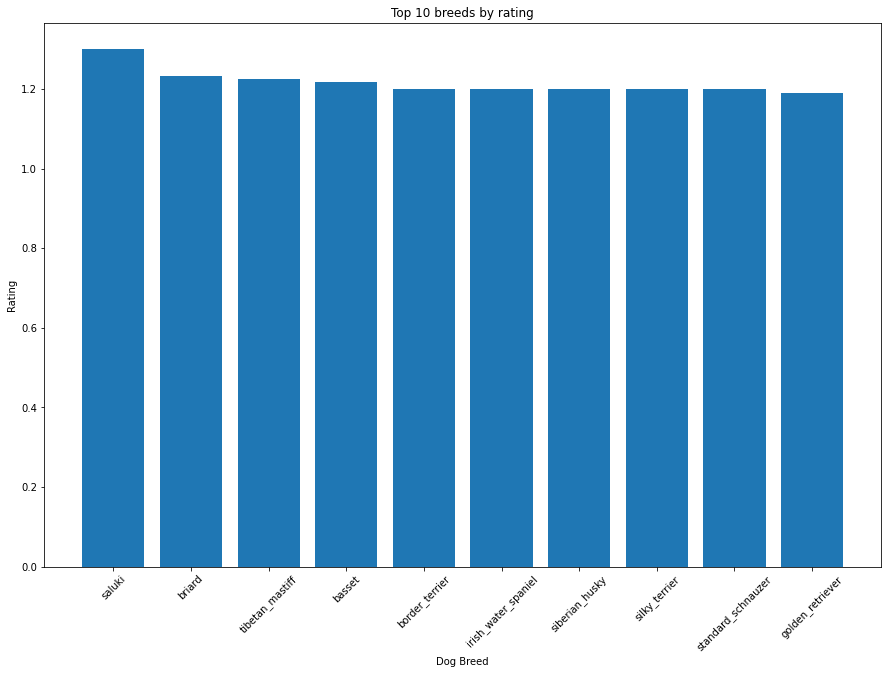

In [88]:
# plot rating of top 10 breeds
fig, ax = plt.subplots(figsize=(15,10))

ax.bar(x = group_by_breed_avg.nlargest(n=10, columns=['rating']).index, 
        height = group_by_breed_avg.nlargest(n=10, columns=['rating']).rating)
plt.xticks(rotation=45)
plt.title('Top 10 breeds by rating')
plt.ylabel('Rating')
plt.xlabel('Dog Breed');

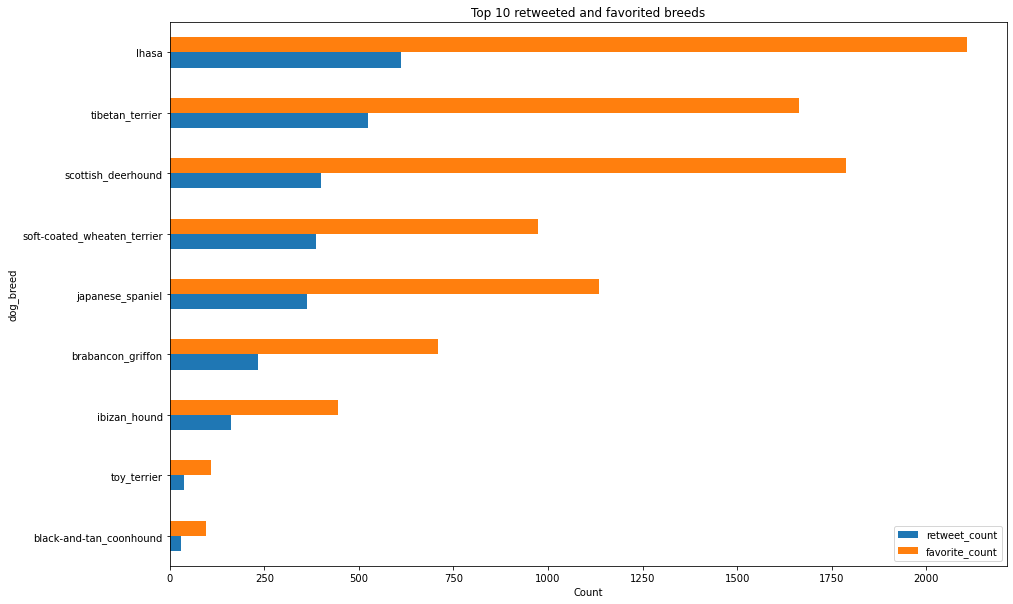

In [93]:
# plot of top 10 retweet and favorite counts

group_by_breed_avg[['retweet_count', 'favorite_count']].sort_values('retweet_count', ascending=True)[:9].plot.barh(figsize=(15,10))
plt.title('Top 10 retweeted and favorited breeds')
plt.xlabel('Count');

In [90]:
# group by dog type. Mean is chosen because difference of quantities of dog types

group_by_type = df_clean.groupby('dog_type')[['retweet_count', 'favorite_count']].mean()

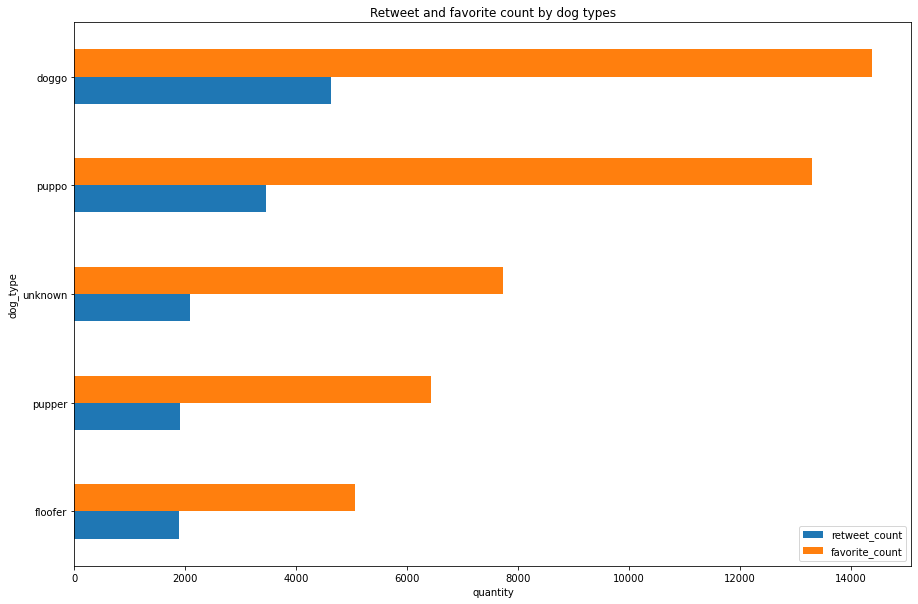

In [92]:
group_by_type.sort_values('retweet_count', ascending=True).plot.barh(figsize=(15,10))
plt.title('Retweet and favorite count by dog types')
plt.xlabel('quantity');